In [17]:
import gym
import random
import time
env=gym.make("Taxi-v2").env
env.render()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [7]:
env.render()
env.step(1)
env.render()

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)


In [67]:
import numpy as np

#random initialiation instead of zeros
q_table=np.random.randn(env.observation_space.n,env.action_space.n)*0.1
#q_table=np.zeros((env.observation_space.n,env.action_space.n))

In [68]:
lr=0.1
gamma=0.6
epsilon=0.1


all_num_steps=[]
all_penalties=[]

num_iter=8000

save_iter=[800,1000,4000,num_iter-1]
saved_models={}

for iter in range(num_iter):
    curr_state=env.reset()
    num_steps=0
    penalties=0
    done=False
    
    #Play until done
    while not done:
        
        #random sampling
        if(random.uniform(0,1) < epsilon):
            action = env.action_space.sample()
        #using the q table for action
        else:
            action = np.argmax(q_table[curr_state])
        
        next_state, reward, done, info = env.step(action)
        if reward == -10:
            penalties+=1
        num_steps+=1
        
        prev_qval=q_table[curr_state][action]
        #update Q table
        q_table[curr_state][action] = (1-lr)*prev_qval + lr*(reward + gamma*np.max(q_table[next_state]))
        
        curr_state=next_state
    if iter%150==0:
        all_num_steps.append(num_steps)
        all_penalties.append(penalties)
    if iter in save_iter:
        saved_models[iter]=q_table.copy()
#     if iter%5000==0:
#         print(penalties)

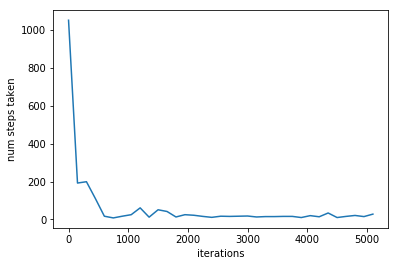

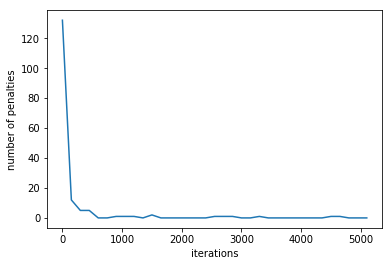

In [63]:
import matplotlib.pyplot as plt
plt.plot(np.array(range(35))*150,all_num_steps[:35])
plt.ylabel('num steps taken')
plt.xlabel('iterations')
plt.show();

plt.plot(np.array(range(35))*150,all_penalties[:35])
plt.ylabel('number of penalties')
plt.xlabel('iterations')
plt.show();


In [64]:
from IPython.display import clear_output

#Test the model
curr_state=env.reset()
num_steps=0
penalties=0
done=False

#Play until done
while not done:
    clear_output(wait=True)
    action = np.argmax(q_table[curr_state])

    next_state, reward, done, info = env.step(action)
    if reward == -10:
        penalties+=1
    num_steps+=1
    curr_state=next_state
    print(env.render(mode='ansi'))
    #print(curr_state)
    time.sleep(1)


+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)



In [71]:
#Visualize models saved at multiple iterations

for iter in saved_models:
    curr_state=env.reset()
    num_steps=0
    penalties=0
    done=False
    curr_qtable=saved_models[iter]
    #Play until done
    while not done:
        if num_steps > 100:
            done=True
            continue
        clear_output(wait=True)
        print(iter)
        action = np.argmax(curr_qtable[curr_state])

        next_state, reward, done, info = env.step(action)
        if reward == -10:
            penalties+=1
        num_steps+=1
        curr_state=next_state
        print(env.render(mode='ansi'))
        print(curr_state)
        time.sleep(0.1)
    #print(num_steps)
    

7999
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

85
